<a href="https://colab.research.google.com/github/Rohanrathod7/my-ml-labs/blob/main/10_Dimensionality_Reduction_in_Python/04_Feature_Extraction.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

### 4. Feature Extraction

In [2]:

import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np
import pandas as pd
import datetime as dt
# Import confusion matrix and train_test_split
from sklearn.metrics import confusion_matrix, classification_report
from sklearn.neighbors import KNeighborsClassifier
from sklearn.svm import SVC
from sklearn.model_selection import train_test_split, KFold, cross_val_score, GridSearchCV
from sklearn.linear_model import Ridge, Lasso, LogisticRegression, LinearRegression
from scipy.cluster.hierarchy import linkage, dendrogram
import matplotlib.pyplot as plt
from sklearn.linear_model import SGDClassifier




url = "https://raw.githubusercontent.com/Rohanrathod7/my-ml-labs/main/10_Dimensionality_Reduction_in_Python/dataset/grocery_sales.csv"
# Read the CSV file
# The original code tried to read a feather file as a CSV, and had a UnicodeDecodeError.
# The file extension is feather, so it should be read using pd.read_feather.
# Also, the variable name was confusing, it should be spotify_population.
sales_df = pd.read_csv(url).apply(pd.to_numeric, errors='coerce')
display(sales_df.head())

url = "https://raw.githubusercontent.com/Rohanrathod7/my-ml-labs/main/10_Dimensionality_Reduction_in_Python/dataset/height_df.csv"
# Read the CSV file
# The original code tried to read a feather file as a CSV, and had a UnicodeDecodeError.
# The file extension is feather, so it should be read using pd.read_feather.
# Also, the variable name was confusing, it should be spotify_population.
height_df = pd.read_csv(url)
display(height_df.head())

,storeID,product,quantity,revenue
0,NaN,NaN,1811,9300.6
1,NaN,NaN,1003,3375.2
2,NaN,NaN,1604,8528.5
3,NaN,NaN,1785,9181.0
4,NaN,NaN,944,3680.2


,weight_kg,height_1,height_2,height_3,height
0,81.5,1.78,1.80,1.80,1.793333
1,72.6,1.70,1.70,1.69,1.696667
2,92.9,1.74,1.75,1.73,1.740000
3,79.4,1.66,1.68,1.67,1.670000
4,94.6,1.91,1.93,1.90,1.913333


**Manual feature extraction I**  
You want to compare prices for specific products between stores. The features in the pre-loaded dataset sales_df are: storeID, product, quantity and revenue. The quantity and revenue features tell you how many items of a particular product were sold in a store and what the total revenue was. For the purpose of your analysis it's more interesting to know the average price per product.

In [3]:
# Calculate the price from the quantity sold and revenue
# Calculate the price from the quantity sold and revenue
sales_df['price'] = sales_df['revenue'] / sales_df['quantity']

# Drop the quantity and revenue features
reduced_df = sales_df.drop(["quantity", "revenue"], axis=1)

print(reduced_df.head())

   storeID  product     price
0      NaN      NaN  5.135616
1      NaN      NaN  3.365105
2      NaN      NaN  5.317020
3      NaN      NaN  5.143417
4      NaN      NaN  3.898517


In [4]:
# Calculate the mean height
height_df['height'] = height_df[['height_1', 'height_2', 'height_3']].mean(axis=1)

# Drop the 3 original height features
reduced_df = height_df.drop(height_df[['height_1', 'height_2', 'height_3']], axis=1)

print(reduced_df.head())

   weight_kg    height
0       81.5  1.793333
1       72.6  1.696667
2       92.9  1.740000
3       79.4  1.670000
4       94.6  1.913333


principal component intuition
Forearm vs. upper arm lengths

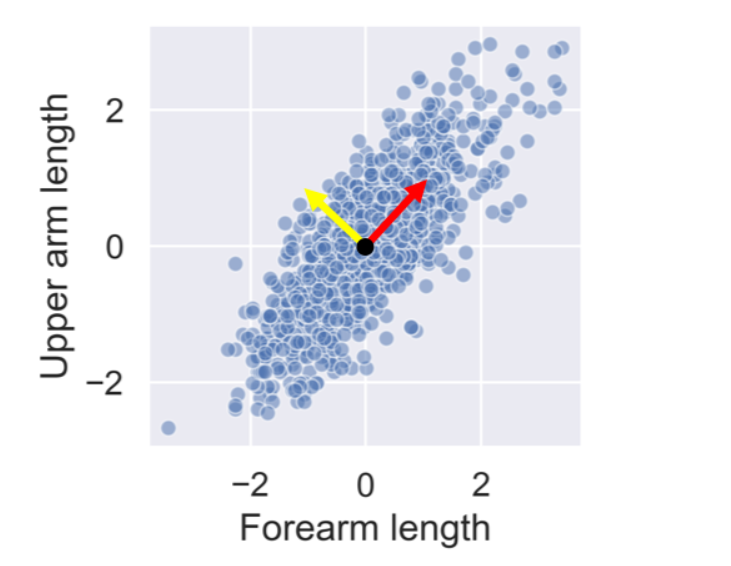

After standardizing the lower and upper arm lengths from the ANSUR dataset we've added two perpendicular vectors that are aligned with the main directions of variance. We can describe each point in the dataset as a combination of these two vectors multiplied with a value each. These values are then called principal components.

Which of the following statements is true?


- --People with a negative component for the yellow vector have long forearms relative to their upper arms.

- People with a positive component for the yellow vector have long forearms relative to their upper arms.

- People with a negative component for the red vector have above average arm lengths.

- People with a positive component for the red vector have below average arm lengths.

### **Calculating Principal Components**  
You'll visually inspect a 4 feature sample of the ANSUR dataset before and after PCA using Seaborn's pairplot(). This will allow you to inspect the pairwise correlations between the features.

The data has been pre-loaded for you as ansur_df.



,abdominalextensiondepthsitting,acromialheight,acromionradialelength,anklecircumference
0,274,1432,317,222
1,189,1446,326,205
2,237,1369,312,222
3,219,1411,341,220
4,285,1360,310,203


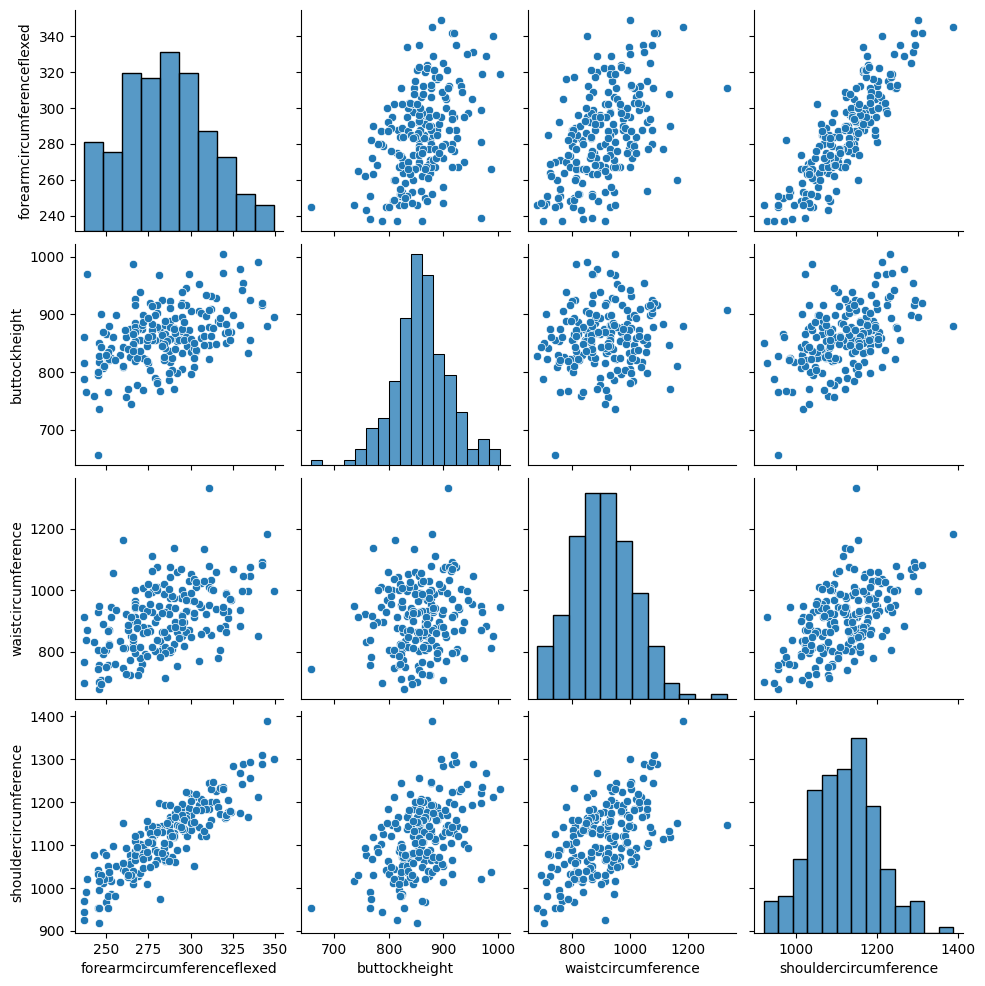

In [15]:
url = "https://raw.githubusercontent.com/Rohanrathod7/my-ml-labs/main/10_Dimensionality_Reduction_in_Python/dataset/ansur_df.csv"
# Read the CSV file
# The original code tried to read a feather file as a CSV, and had a UnicodeDecodeError.
# The file extension is feather, so it should be read using pd.read_feather.
# Also, the variable name was confusing, it should be spotify_population.
ansur_df = pd.read_csv(url).apply(pd.to_numeric, errors='coerce')
display(ansur_df.iloc[:, 1:5].head())

ansur_df = ansur_df.loc[:, ['forearmcircumferenceflexed', 'buttockheight', 'waistcircumference', 'shouldercircumference']]
# Create a pairplot to inspect ansur_df
sns.pairplot(ansur_df)

plt.show()

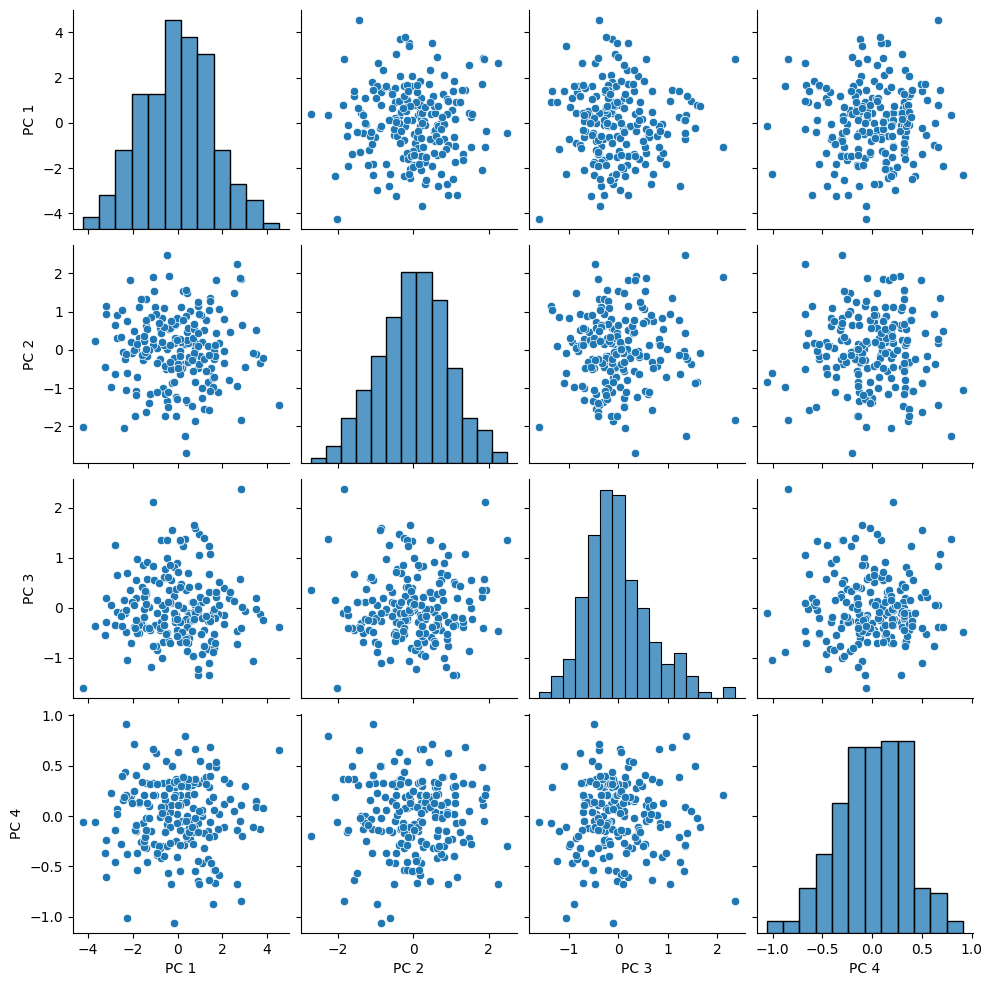

In [16]:
from sklearn.preprocessing import StandardScaler
from sklearn.decomposition import PCA

# Create the scaler
scaler = StandardScaler()
ansur_std = scaler.fit_transform(ansur_df)

# Create the PCA instance and fit and transform the data with pca
pca = PCA()
pc = pca.fit_transform(ansur_std)
pc_df = pd.DataFrame(pc, columns=['PC 1', 'PC 2', 'PC 3', 'PC 4'])

# Create a pairplot of the principal component DataFrame
sns.pairplot(pc_df)
plt.show()

# Notice how, in contrast to the input features, none of the principal components are correlated to one another.

**PCA on a larger dataset**  
You'll now apply PCA on a somewhat larger ANSUR datasample with 13 dimensions, once again pre-loaded as ansur_df. The fitted model will be used in the next exercise. Since we are not using the principal components themselves there is no need to transform the data, instead, it is sufficient to fit pca to the data.

In [25]:
from sklearn.preprocessing import StandardScaler
from sklearn.decomposition import PCA

url = "https://raw.githubusercontent.com/Rohanrathod7/my-ml-labs/main/10_Dimensionality_Reduction_in_Python/dataset/ansur_df.csv"
# Read the CSV file
# The original code tried to read a feather file as a CSV, and had a UnicodeDecodeError.
# The file extension is feather, so it should be read using pd.read_feather.
# Also, the variable name was confusing, it should be spotify_population.
ansur_df = pd.read_csv(url).apply(pd.to_numeric, errors='coerce')
display(ansur_df.head())


ansur_df = ansur_df.loc[:, ['sittingheight', 'buttockheight', 'waistdepth', 'span', 'waistcircumference', 'shouldercircumference', 'footlength', 'handlength', 'functionalleglength', 'chestheight', 'chestcircumference',
       'cervicaleheight', 'sittingheight']]

# Scale the data
scaler = StandardScaler()
ansur_std = scaler.fit_transform(ansur_df)

# Apply PCA
pca = PCA()
pca.fit(ansur_std)

# You've fitted PCA on our 13 feature datasample. Now let's see how the components explain the variance.

,Gender,abdominalextensiondepthsitting,acromialheight,acromionradialelength,anklecircumference,axillaheight,balloffootcircumference,balloffootlength,biacromialbreadth,bicepscircumferenceflexed,...,verticaltrunkcircumferenceusa,waistbacklength,waistbreadth,waistcircumference,waistdepth,waistfrontlengthsitting,waistheightomphalion,wristcircumference,wristheight,weight_kg
0,NaN,274,1432,317,222,1330,242,196,392,350,...,1683,470,325,944,243,413,1066,176,872,81.2
1,NaN,189,1446,326,205,1340,240,210,411,295,...,1593,475,283,759,181,359,1057,164,868,62.1
2,NaN,237,1369,312,222,1254,244,188,383,343,...,1569,453,311,897,218,371,1011,175,805,75.8
3,NaN,219,1411,341,220,1306,248,195,408,314,...,1580,444,299,852,219,368,1066,176,804,74.5
4,NaN,285,1360,310,203,1252,232,182,395,357,...,1698,465,348,1001,261,386,961,162,833,81.9


PCA()

**PCA explained variance**  
You'll be inspecting the variance explained by the different principal components of the pca instance you created in the previous exercise.

In [26]:

# Inspect the explained variance ratio per component
print(pca.explained_variance_ratio_)

[0.61856734 0.20827769 0.07706857 0.03393579 0.02425577 0.01080358
 0.00815768 0.00721837 0.00441262 0.00351076 0.00238554 0.0014063
 0.        ]


How much of the variance is explained by the 4th principal component?
-> 3.77

In [27]:
# Print the cumulative sum of the explained variance ratio
print(pca.explained_variance_ratio_.cumsum())

[0.61856734 0.82684503 0.9039136  0.93784939 0.96210516 0.97290874
 0.98106642 0.98828478 0.9926974  0.99620816 0.9985937  1.
 1.        ]


What's the lowest number of principal components you should keep if you don't want to lose more than 10% of explained variance during dimensionality reduction?
Possible answers


2 principal components   81%

3 principal components   88%

-- 4 principal components

5 principal components

Using just 4 principal components we can explain more than 90% of the variance in the 13 feature dataset.

**Understanding the components**  
You'll apply PCA to the numeric features of the Pokemon dataset, poke_df, using a pipeline to combine the feature scaling and PCA in one go. You'll then interpret the meanings of the first two components.

All relevant packages and classes have been pre-loaded for you (Pipeline(), StandardScaler(), PCA()).

In [30]:
from sklearn.pipeline import Pipeline
from sklearn.preprocessing import StandardScaler
from sklearn.decomposition import PCA
import pandas as pd

url = "https://raw.githubusercontent.com/Rohanrathod7/my-ml-labs/main/10_Dimensionality_Reduction_in_Python/dataset/pokemon.csv"
poke_df = pd.read_csv(url)

# Build the pipeline
pipe = Pipeline([('scaler', StandardScaler()),
                         ('reducer', PCA(n_components=2))])

# Fit it to the dataset and extract the component vectors
# Exclude non-numeric columns before fitting the pipeline
numeric_cols = poke_df.select_dtypes(include=np.number).columns
pipe.fit(poke_df[numeric_cols])
vectors = pipe['reducer'].components_.round(2)

# Print feature effects
print('PC 1 effects = ' + str(dict(zip(numeric_cols, vectors[0]))))
print('PC 2 effects = ' + str(dict(zip(numeric_cols, vectors[1]))))

# Inspect the PC 1 effects. Which statement is true?
# Possible answers


# - Sp. Atk has the biggest effect on this feature by far. PC 1 can be interpreted as a measure of how good a Pokemon's special attack is.

# - --All features have a similar positive effect. PC 1 can be interpreted as a measure of overall quality (high stats).



# Inspect the PC 2 effects. Which statement is true?

# - Defense has a strong positive effect on the second component and speed a strong negative one. This component quantifies an agility versus armor and protection trade-off.

# - Fast Pokemon have high values for this component.

PC 1 effects = {'#': np.float64(0.11), 'Total': np.float64(0.51), 'HP': np.float64(0.33), 'Attack': np.float64(0.38), 'Defense': np.float64(0.31), 'Sp. Atk': np.float64(0.39), 'Sp. Def': np.float64(0.38), 'Speed': np.float64(0.28), 'Generation': np.float64(0.07)}
PC 2 effects = {'#': np.float64(0.69), 'Total': np.float64(-0.07), 'HP': np.float64(-0.01), 'Attack': np.float64(-0.03), 'Defense': np.float64(-0.01), 'Sp. Atk': np.float64(-0.06), 'Sp. Def': np.float64(-0.05), 'Speed': np.float64(-0.11), 'Generation': np.float64(0.7)}


**PCA for feature exploration**  
You'll use the PCA pipeline you've built in the previous exercise to visually explore how some categorical features relate to the variance in poke_df. These categorical features (Type & Legendary) can be found in a separate DataFrame poke_cat_df.

All relevant packages and classes have been pre-loaded for you (Pipeline(), StandardScaler(), PCA())

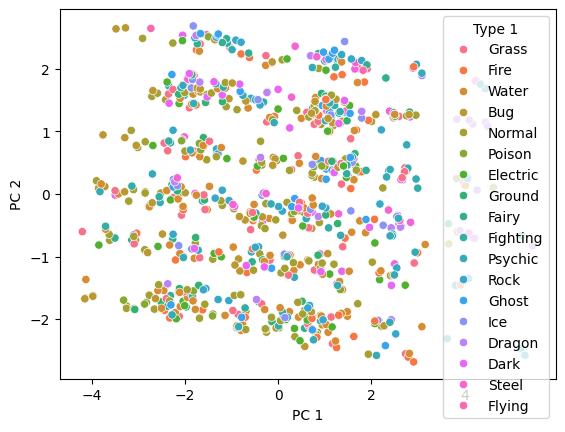

In [32]:
pipe = Pipeline([('scaler', StandardScaler()),
                 ('reducer', PCA(n_components=2))])

# Fit the pipeline to poke_df and transform the data
numeric_cols = poke_df.select_dtypes(include=np.number).columns
pc = pipe.fit_transform(poke_df[numeric_cols])

# Add the 2 components to poke_cat_df
poke_cat_df = poke_df[['Type 1', 'Legendary']].copy()
poke_cat_df['PC 1'] = pc[:, 0]
poke_cat_df['PC 2'] = pc[:, 1]

# Use the Type feature to color the PC 1 vs. PC 2 scatterplot
sns.scatterplot(data=poke_cat_df,
                x='PC 1', y='PC 2', hue='Type 1')
plt.show()

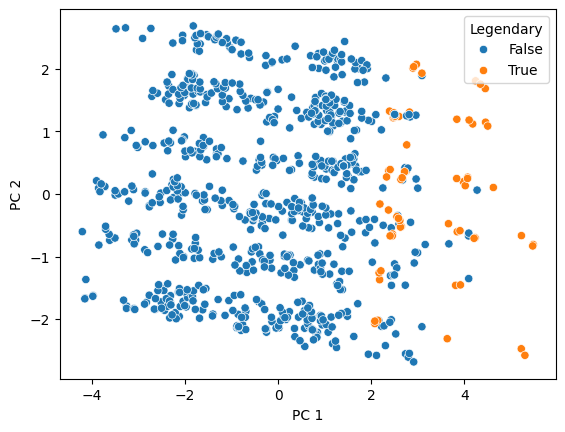

In [34]:
pipe = Pipeline([('scaler', StandardScaler()),
                 ('reducer', PCA(n_components=2))])

# Fit the pipeline to poke_df and transform the data
numeric_cols = poke_df.select_dtypes(include=np.number).columns
pc = pipe.fit_transform(poke_df[numeric_cols])

# Add the 2 components to poke_cat_df
poke_cat_df['PC 1'] = pc[:, 0]
poke_cat_df['PC 2'] = pc[:, 1]

# Use the Legendary feature to color the PC 1 vs. PC 2 scatterplot
sns.scatterplot(data=poke_cat_df,
                x='PC 1', y='PC 2', hue="Legendary")
plt.show()


# Looks like the different types are scattered all over the place while the legendary Pokemon always score high
# for PC 1 meaning they have high stats overall. Their spread along the PC 2 axis tells us they aren't
# consistently fast and vulnerable nor slow and armored.

**PCA in a model pipeline**  
We just saw that legendary Pokemon tend to have higher stats overall. Let's see if we can add a classifier to our pipeline that detects legendary versus non-legendary Pokemon based on the principal components.

The data has been pre-loaded for you and split into training and tests datasets: X_train, X_test, y_train, y_test.

Same goes for all relevant packages and classes(Pipeline(), StandardScaler(), PCA(), RandomForestClassifier()).

In [36]:
from sklearn.pipeline import Pipeline
from sklearn.preprocessing import StandardScaler
from sklearn.decomposition import PCA
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import train_test_split
import pandas as pd
import numpy as np


# Split the data into features (X) and target (y)
numeric_cols = poke_df.select_dtypes(include=np.number).columns
X = poke_df[numeric_cols]
y = poke_df['Legendary']


# Split the data into training and test sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=0)


# Build the pipeline
pipe = Pipeline([
        ('scaler', StandardScaler()),
        ('reducer', PCA(n_components=3)),
        ('classifier', RandomForestClassifier(random_state=0))])

# Fit the pipeline to the training data
pipe.fit(X_train, y_train)

# Score the accuracy on the test set
accuracy = pipe.score(X_test, y_test)

# Prints the explained variance ratio and accuracy
print(pipe['reducer'].explained_variance_ratio_)
print(f'{accuracy:.1%} test set accuracy')

# Looks like adding the third component does not increase the model accuracy, even though it adds information to the dataset.

[0.42415926 0.21997463 0.11837934]
93.1% test set accuracy


***Selecting the proportion of variance to keep***  
You'll let PCA determine the number of components to calculate based on an explained variance threshold that you decide.

You'll work on the numeric ANSUR female dataset pre-loaded as ansur_df.

All relevant packages and classes have been pre-loaded too (Pipeline(), StandardScaler(), PCA())

In [41]:
url = "https://raw.githubusercontent.com/Rohanrathod7/my-ml-labs/main/10_Dimensionality_Reduction_in_Python/dataset/ansur_df.csv"
ansur_df = pd.read_csv(url)

# Let PCA select 90% of the variance
pipe = Pipeline([('scaler', StandardScaler()),
        		 ('reducer', PCA(n_components=0.9))])

# Fit the pipe to the data
pipe.fit(ansur_df.iloc[:, 2:])

print(f'{len(pipe["reducer"].components_)} components selected')

# How many additional features do you need to explain 90% instead of 80% of the variance?
12

# We need to more than double the number of components to go from 80% to 90% explained variance.

15 components selected


12

**Choosing the number of components**  
You'll now make a more informed decision on the number of principal components to reduce your data to using the "elbow in the plot" technique. One last time, you'll work on the numeric ANSUR female dataset pre-loaded as ansur_df.

All relevant packages and classes have been pre-loaded for you (Pipeline(), StandardScaler(), PCA()).

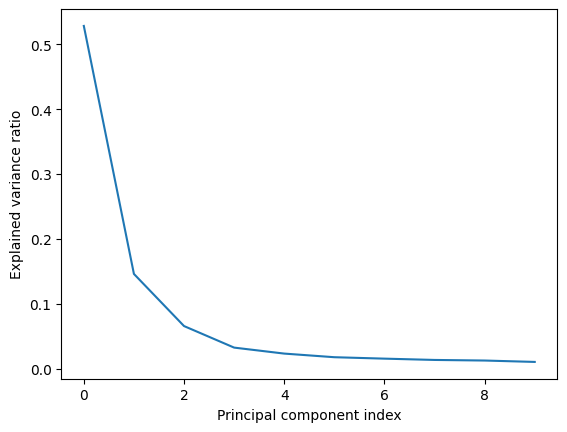

In [44]:
# Pipeline a scaler and pca selecting 10 components
pipe = Pipeline([('scaler', StandardScaler()),
        		 ('reducer', PCA(n_components=10))])

# Fit the pipe to the data
pipe.fit(ansur_df.iloc[:, 2:])

# Plot the explained variance ratio
plt.plot(pipe['reducer'].explained_variance_ratio_)

plt.xlabel('Principal component index')
plt.ylabel('Explained variance ratio')
plt.show()

# To how many components can you reduce the dataset without compromising too much on explained variance? Note that the x-axis is zero indexed.

# -> The 'elbow' in the plot is at 3 components (the 3rd component has index 2).

**PCA for image compression**  
You'll reduce the size of 16 images with hand written digits (MNIST dataset) using PCA.

The samples are 28 by 28 pixel gray scale images that have been flattened to arrays with 784 elements each (28 x 28 = 784) and added to the 2D numpy array X_test. Each of the 784 pixels has a value between 0 and 255 and can be regarded as a feature.

A pipeline with a scaler and PCA model to select 78 components has been pre-loaded for you as pipe. This pipeline has already been fitted to the entire MNIST dataset except for the 16 samples in X_test.

Finally, a function plot_digits has been created for you that will plot 16 images in a grid.

In [46]:
# Transform the input data to principal components
pc = pipe.transform(X_test)

# Inverse transform the components to original feature space
X_rebuilt = pipe.inverse_transform(pc)

# Plot the reconstructed data
plot_digits(X_rebuilt)

print(f"X_rebuilt has {X_rebuilt.shape[1]} features")

# You've reduced the size of the data 10 fold but were able to reconstruct images with reasonable quality.

ValueError: The feature names should match those that were passed during fit.
Feature names unseen at fit time:
- #
- Attack
- Defense
- Generation
- HP
- ...
Feature names seen at fit time, yet now missing:
- acromialheight
- acromionradialelength
- anklecircumference
- axillaheight
- balloffootcircumference
- ...
